## Оглавление: <a id='step0'></a>
[1. Изучение общей информации о датафреймах](#step1)  
[2. Предобработка данных](#step2)  
[3. Создание единого датафрейма, добавление требуемых данных](#step3)  
[4. Исследовательский анализ данных](#step4)  
[5. Проверка гипотез](#step5)  
[6. Общий вывод](#step6)

# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» (федеральный оператор сотовой связи) предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов:

**1.Тариф «Смарт»**

   * Ежемесячная плата: 550 рублей
   * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    
   *Стоимость услуг сверх тарифного пакета:*
   * минута разговора: 3 рубля
   * сообщение: 3 рубля
   * 1 Гб интернет-трафика: 200 рублей

**2.Тариф «Ультра»**

   * Ежемесячная плата: 1950 рублей
   * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   
   *Стоимость услуг сверх тарифного пакета:*
   * минута разговора: 1 рубль
   * сообщение: 1 рубль
   * 1 Гб интернет-трафика: 150 рублей

**Внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных:

**Таблица users (информация о пользователях):**

   * user_id — уникальный идентификатор пользователя
   * first_name — имя пользователя
   * last_name — фамилия пользователя
   * age — возраст пользователя (годы)
   * reg_date — дата подключения тарифа (день, месяц, год)
   * churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф      ещё действовал на момент выгрузки данных)
   * city — город проживания пользователя
   * tariff — название тарифного плана

**Таблица calls (информация о звонках):**

   * id — уникальный номер звонка
   * call_date — дата звонка
   * duration — длительность звонка в минутах
   * user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

   * id — уникальный номер сообщения
   * message_date — дата сообщения
   * user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

   * id — уникальный номер сессии
   * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
   * session_date — дата интернет-сессии
   * user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

   * tariff_name — название тарифа
   * rub_monthly_fee — ежемесячная абонентская плата в рублях
   * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
   * messages_included — количество сообщений в месяц, включённых в абонентскую плату
   * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в        мегабайтах)
   * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в      тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
   * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
   * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного          пакета (1 гигабайт = 1024 мегабайта)


### 1. Изучение общей информации о датафреймах. <a id='step1'></a>

In [1]:
#импортируем требуемые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

try:
    users = pd.read_csv('/datasets/users.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    
except:
    users = pd.read_csv('home/an4ouce/datasets/users.csv')
    tariffs = pd.read_csv('home/an4ouce/datasets/tariffs.csv')
    calls = pd.read_csv('home/an4ouce/datasets/calls.csv')
    internet = pd.read_csv('home/an4ouce/datasets/internet.csv')
    messages = pd.read_csv('home/an4ouce/datasets/messages.csv')
    
display(users.head())
display(tariffs)
display(calls.head())
display(internet.head())
display(messages.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [2]:
display(users.info())
display(tariffs.info())
display(calls.info())
display(messages.info())
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Таблица **"users"** содержит 500 строк с информацией о клиентах компании "Мегалайн". Имеется 462 пропущенных значения в столбце churn_date, но согласно информации о данных, если в указанном столбце пропуск, значит, клиент еще пользовался тарифом на момент выгрузки данных. Пропуски в данном столбце - нормальное явление, их не нужно обрабатывать.
Данные в столбцах churn_date и reg_date переведем в формат datetime.

------

Таблица **"tariffs"** содержит 2 строки с информацией о тарифах компании "Мегалайн". Пропуски отсутствуют, типы данных приведены в нужный формат.

------

Таблица **"calls"** содержит 202607 строк с информацией о звонках, сделанных клиентами. Пропуски отсутствуют. Данные в столбце call_date переведем в формат datetime. Данные в столбце duration округлим вверх до целого числа (правила компании "Мегалайн") и переведем в тип int.

------

Таблица **"messages"** содержит 123036 строк с информацией о sms-сообщениях, отправленных клиентами. Пропуски отсутствуют. Данные в столбце message_date переведем в формат datetime. 

------

Таблица **"internet"** содержит 149396 строк с информацией об интернет-сессиях клиентов. Пропуски отсутствуют. Данные в столбце session_date переведем в формат datetime. Данные в столбце mb_used округлим вверх до целого числа (правила компании "Мегалайн") и переведем в тип int.

Займемся предобработкой и изменением типов данных.

<a href='#step0'>Вернуться к оглавлению</a>

### 2. Предобработка данных. <a id='step2'></a>

Для начала проверим, нет ли дубликатов в таблицах:

In [3]:
users.duplicated().sum()

0

In [4]:
calls.duplicated().sum()

0

In [5]:
messages.duplicated().sum()

0

In [6]:
internet.duplicated().sum()

0

Отлично, дубликатов нет. 
Проверим, есть ли у нас звонки и интернет-сессии нулевой длительности:

In [7]:
calls.query('duration == 0.00')['duration'].count()

39613

In [8]:
internet.query('mb_used == 0.00')['mb_used'].count()

19598

39613 звонков и 19598 интернет-сессий. Предположительно, нулевая длительность получилась, когда клиент не смог дозвониться, либо появился и тут же пропал сигнал мобильного интернета(для интернет-сессий). Взглянем на гистограммы:

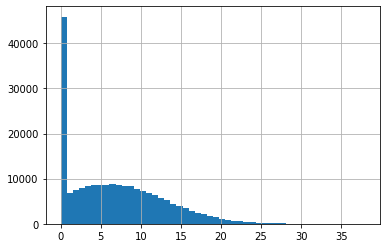

In [9]:
calls['duration'].hist(bins=50)
plt.show()

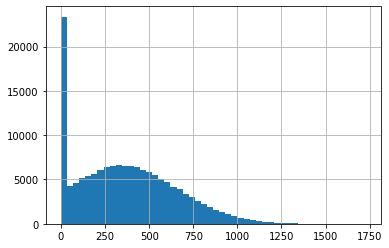

In [10]:
internet['mb_used'].hist(bins=50)
plt.show()

Видим, что довольно часто встречаются нулевые звонки и интернет-сессии. Удалим эти строки из датафреймов, так как такие звонки и интернет-сессии не расходуют пакет минут и интернет-трафик, и значит, не важны для нашего исследования. Более того, такие выбросы могут негативно сказаться на результатах исследования.

In [11]:
calls = calls.query('duration != 0.00')

In [12]:
calls.shape[0]

162994

In [13]:
internet = internet.query('mb_used != 0.00')

In [14]:
internet.shape[0]

129798

Построим гистограммы без выбросов:

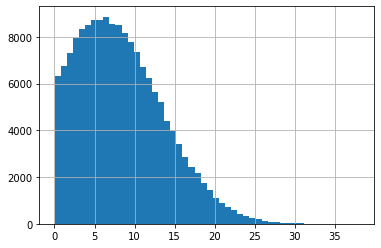

In [15]:
calls['duration'].hist(bins=50)
plt.show()

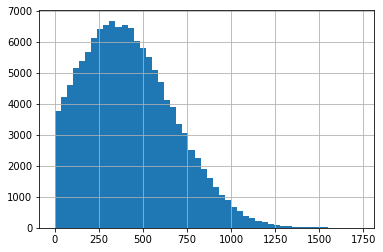

In [16]:
internet['mb_used'].hist(bins=50)
plt.show()

Теперь приведем данные в требуемых столбцах к формату datetime:

In [17]:
def to_datetime(data):
    column_list = ['reg_date', 'churn_date', 'call_date', 'message_date', 'session_date']
    
    for col in column_list:
        if col in data.columns:
            data[col] = pd.to_datetime(data[col], format='%Y-%m-%d')

In [18]:
to_datetime(users)
to_datetime(calls)
to_datetime(messages)
to_datetime(internet)

Округлим вверх минуты разговора и мегабайты интернет-трафика, переведем в целочисленный тип:

In [19]:
def ceil_round(data):
    column_list = ['duration', 'mb_used']
    for col in column_list:
        if col in data.columns:
            data[col] = data[col].apply(np.ceil).astype('int')

In [20]:
ceil_round(calls)
ceil_round(internet)

In [21]:
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000


In [22]:
display(calls.info())
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.9+ MB


None

### Вывод:         
Готово. Требуемые данные приведены к нужному формату, удалены выбросы, можно приступать к созданию сводной таблицы.

<a href='#step0'>Вернуться к оглавлению</a>

### 3. Создание единого датафрейма, добавление требуемых данных. <a id='step3'></a>

Для дальнейшей работы нам понадобится единый датафрейм, так как требуется посчитать помесячную выручку с каждого клиента, а это удобнее сделать, когда все звонки, сообщения и мегабайты находятся под рукой.

In [23]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

Объединим таблицы **users** и **tariffs**, где каждому клиенту будет соответствовать тариф и характеристики тарифа.

In [24]:
users_tariffs = users.merge(tariffs, on='tariff', how='inner')

In [25]:
users_tariffs.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1


Теперь создадим в таблицах **calls**, **messages**, **internet** столбцы с месяцем, полученным из соответствующих столбцов с датой.

In [26]:
def month(data):
    column_list = ['call_date', 'message_date', 'session_date']
    
    for col in column_list:
        if col in data.columns:
            data['month'] = data[col].dt.month

In [27]:
month(calls)
month(messages)
month(internet)

In [28]:
display(calls.head())
display(messages.head())
display(internet.head())

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


Создадим сводные таблицы звонков, сообщений и интернет-трафика, сгруппированные по клиентам и месяцам.

In [29]:
#сводная таблица звонков
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot.columns = ['calls', 'minutes']
calls_pivot.head(10)

calls  minutes
user_id month                
1000    5         17      159
        6         28      172
        7         41      340
        8         42      408
        9         46      466
        10        44      350
        11        37      338
        12        38      333
1001    11        45      430
        12        47      414

In [30]:
#сводная таблица сообщений
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot.columns = ['sms']
messages_pivot.head(10)

sms
user_id month     
1000    5       22
        6       60
        7       75
        8       81
        9       57
        10      73
        11      58
        12      70
1002    6        4
        7       11

In [31]:
#сводная таблица интернет-трафика
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot.head(10)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

In [32]:
pivot_all = internet_pivot.join(messages_pivot, on=['user_id','month']).join(calls_pivot, on=['user_id','month'])

In [33]:
pivot_all.head(10)

mb_used   sms  calls  minutes
user_id month                               
1000    5         2256  22.0   17.0    159.0
        6        23257  60.0   28.0    172.0
        7        14016  75.0   41.0    340.0
        8        14070  81.0   42.0    408.0
        9        14581  57.0   46.0    466.0
        10       14717  73.0   44.0    350.0
        11       14768  58.0   37.0    338.0
        12        9827  70.0   38.0    333.0
1001    11       18452   NaN   45.0    430.0
        12       14053   NaN   47.0    414.0

Теперь объединим эти сводные таблицы с таблицей **users_tariffs**:

In [34]:
table = pivot_all.join(users_tariffs.set_index('user_id'), on='user_id', how='left')

In [35]:
table.columns = ['mb_used', 'sms', 'calls', 'minutes', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']

In [36]:
table.head(10)

mb_used   sms  calls  minutes  age churn_date       city  \
user_id month                                                             
1000    5         2256  22.0   17.0    159.0   52        NaT  Краснодар   
        6        23257  60.0   28.0    172.0   52        NaT  Краснодар   
        7        14016  75.0   41.0    340.0   52        NaT  Краснодар   
        8        14070  81.0   42.0    408.0   52        NaT  Краснодар   
        9        14581  57.0   46.0    466.0   52        NaT  Краснодар   
        10       14717  73.0   44.0    350.0   52        NaT  Краснодар   
        11       14768  58.0   37.0    338.0   52        NaT  Краснодар   
        12        9827  70.0   38.0    333.0   52        NaT  Краснодар   
1001    11       18452   NaN   45.0    430.0   41        NaT     Москва   
        12       14053   NaN   47.0    414.0   41        NaT     Москва   

              first_name  last_name   reg_date tariff  messages_included  \
user_id month                                                              
1000    5         Рафаил  Верещагин 2018-05-25  ultra               1000   
        6         Рафаил  Верещагин 2018-05-25  ultra               1000   
        7         Рафаил  Верещагин 2018-05-25  ultra               1000   
        8         Рафаил  Верещагин 2018-05-25  ultra               1000   
        9         Рафаил  Верещагин 2018-05-25  ultra               1000   
        10        Рафаил  Верещагин 2018-05-25  ultra               1000   
        11        Рафаил  Верещагин 2018-05-25  ultra               1000   
        12        Рафаил  Верещагин 2018-05-25  ultra               1000   
1001    11          Иван       Ежов 2018-11-01  smart                 50   
        12          Иван       Ежов 2018-11-01  smart                 50   

               mb_per_month_included  minutes_included  rub_monthly_fee  \
user_id month                                                             
1000    5                      30720              3000             1950   
        6                      30720              3000             1950   
        7                      30720              3000             1950   
        8                      30720              3000             1950   
        9                      30720              3000             1950   
        10                     30720              3000             1950   
        11                     30720              3000             1950   
        12                     30720              3000             1950   
1001    11                     15360               500              550   
        12                     15360               500              550   

               rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                               
1000    5             150                1               1  
        6             150                1               1  
        7             150                1               1  
        8             150                1               1  
        9             150                1               1  
        10            150                1               1  
        11            150                1               1  
        12            150                1               1  
1001    11            200                3               3  
        12            200                3               3

In [37]:
table['calls'].isnull().sum()

46

In [38]:
table['sms'].isnull().sum()

497

In [39]:
table['mb_used'].isnull().sum()

0

Получилась наглядная сводная таблица с информацией и клиентах, а также сделанных ими звонках, отправленных сообщениях и израсходованном интернет-трафике. Для каждого клиента указанные данные посчитаны по месяцам. В результате такой разбивки получились пропущенные значения в столбцах **calls** (и соответственно **minutes**) и **sms**. Бывает так, что люди за целый месяц ни разу не воспользуются голосовой связью и sms, но зато абсолютно все пользуются интернетом, что не может не радовать - всеобщая цифровизация. Заменим пропуски на ноль (что будет означать, что в определенном месяце люди не пользовались данным типом связи).

In [40]:
table[['calls', 'sms', 'minutes']] = table[['calls', 'sms', 'minutes']].fillna(0)

In [41]:
table[['calls', 'sms', 'minutes']].isnull().sum()

calls      0
sms        0
minutes    0
dtype: int64

In [42]:
table[['calls', 'sms', 'minutes']] = table[['calls', 'sms', 'minutes']].astype('int')

Проверим, есть ли "мертвые души" - неактивные пользователи, кто ни разу за месяц не воспользовался ни голосовой связью, ни смс, ни интернетом:

In [43]:
table.query('calls == 0 and sms == 0 and mb_used == 0')

,,mb_used,sms,calls,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,month,,,,,,,,,,,,,,,,,,


Все пользователи активные, отлично. Теперь напишем функцию, которая будет считать помесячную выручку от клиента в зависимости от параметров его тарифного плана.

In [44]:
def monthly_amount(minutes, minutes_included, rub_per_minute, sms, messages_included,
                   rub_per_message, mb_used, mb_per_month_included, rub_per_gb,
                   rub_monthly_fee):
    
    if minutes > minutes_included:
        pay_for_calls = (minutes - minutes_included)*rub_per_minute
    else:
        pay_for_calls = 0
        
        
    if sms > messages_included:
        pay_for_sms = (sms - messages_included)*rub_per_message
    else:
        pay_for_sms = 0
        
        
    if mb_used > mb_per_month_included:
        pay_for_internet = ((mb_used - mb_per_month_included)/1024)*rub_per_gb
    else:
        pay_for_internet = 0  
    
    pay_for_month = rub_monthly_fee + pay_for_calls + pay_for_sms + pay_for_internet
    
    return pay_for_month

И еще одну функцию, которая будет считать минуты, сообщения и интернет-трафик, превышающий лимиты тарифного плана.

In [45]:
def extra(x, x_included):
    
    if x > x_included:
        extra = x-x_included
    else:
        extra = 0
        
    return extra

Создадим столбцы **extra_minutes**, **extra_sms**, **extra_internet**, с минутами, смс и мегабайтами, выходящими за лимиты тарифного плана по месяцам:

In [46]:
table['extra_minutes'] = table.apply(lambda row: extra(row['minutes'],
                                                       row['minutes_included']), axis=1)

In [47]:
table['extra_sms'] = table.apply(lambda row: extra(row['sms'],
                                                   row['messages_included']), axis=1)

In [48]:
table['extra_internet'] = table.apply(lambda row: extra(row['mb_used'],
                                                        row['mb_per_month_included']),
                                                        axis=1)

Столбец **pay_for_month** с ежемесячной выручкой от каждого пользователя:

In [49]:
table['pay_for_month'] = table.apply(lambda row: 
                                     monthly_amount(row['minutes'],
                                     row['minutes_included'],
                                     row['rub_per_minute'],
                                     row['sms'],
                                     row['messages_included'],
                                     row['rub_per_message'],
                                     row['mb_used'],
                                     row['mb_per_month_included'],
                                     row['rub_per_gb'], row['rub_monthly_fee']), axis=1)

Столбец **extra_pay** с переплатой:

In [50]:
table['extra_pay'] = table['pay_for_month'] - table['rub_monthly_fee']

In [51]:
table.head(10)

mb_used  sms  calls  minutes  age churn_date       city  \
user_id month                                                            
1000    5         2256   22     17      159   52        NaT  Краснодар   
        6        23257   60     28      172   52        NaT  Краснодар   
        7        14016   75     41      340   52        NaT  Краснодар   
        8        14070   81     42      408   52        NaT  Краснодар   
        9        14581   57     46      466   52        NaT  Краснодар   
        10       14717   73     44      350   52        NaT  Краснодар   
        11       14768   58     37      338   52        NaT  Краснодар   
        12        9827   70     38      333   52        NaT  Краснодар   
1001    11       18452    0     45      430   41        NaT     Москва   
        12       14053    0     47      414   41        NaT     Москва   

              first_name  last_name   reg_date  ... minutes_included  \
user_id month                                   ...                    
1000    5         Рафаил  Верещагин 2018-05-25  ...             3000   
        6         Рафаил  Верещагин 2018-05-25  ...             3000   
        7         Рафаил  Верещагин 2018-05-25  ...             3000   
        8         Рафаил  Верещагин 2018-05-25  ...             3000   
        9         Рафаил  Верещагин 2018-05-25  ...             3000   
        10        Рафаил  Верещагин 2018-05-25  ...             3000   
        11        Рафаил  Верещагин 2018-05-25  ...             3000   
        12        Рафаил  Верещагин 2018-05-25  ...             3000   
1001    11          Иван       Ежов 2018-11-01  ...              500   
        12          Иван       Ежов 2018-11-01  ...              500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
user_id month                                                                 
1000    5                 1950         150                1               1   
        6                 1950         150                1               1   
        7                 1950         150                1               1   
        8                 1950         150                1               1   
        9                 1950         150                1               1   
        10                1950         150                1               1   
        11                1950         150                1               1   
        12                1950         150                1               1   
1001    11                 550         200                3               3   
        12                 550         200                3               3   

               extra_minutes  extra_sms  extra_internet  pay_for_month  \
user_id month                                                            
1000    5                  0          0               0     1950.00000   
        6                  0          0               0     1950.00000   
        7                  0          0               0     1950.00000   
        8                  0          0               0     1950.00000   
        9                  0          0               0     1950.00000   
        10                 0          0               0     1950.00000   
        11                 0          0               0     1950.00000   
        12                 0          0               0     1950.00000   
1001    11                 0          0            3092     1153.90625   
        12                 0          0               0      550.00000   

               extra_pay  
user_id month             
1000    5        0.00000  
        6        0.00000  
        7        0.00000  
        8        0.00000  
        9        0.00000  
        10       0.00000  
        11       0.00000  
        12       0.00000  
1001    11     603.90625  
        12       0.00000  

[10 rows x 23 columns]

### Вывод:         

Данные подготовлены в удобном формате, готовы к анализу. 

<a href='#step0'>Вернуться к оглавлению</a>

### 4. Исследовательский анализ данных. <a id='step4'></a>

Взглянем на распределение пользователей по тарифам:

In [52]:
clients_tariffs = users_tariffs['tariff'].value_counts().to_frame()
clients_tariffs.columns = ['clients']
clients_tariffs['percent'] = ((clients_tariffs['clients']/500)*100).round(1)
display(clients_tariffs)

,clients,percent
smart,351,70.2
ultra,149,29.8


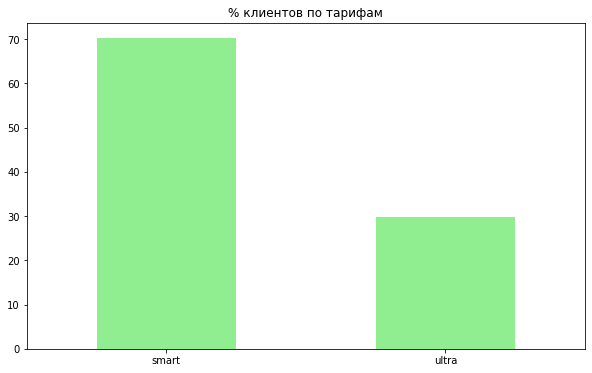

In [53]:
clients_tariffs.plot(y='percent', kind='bar', rot=0, color='lightgreen',
                title='% клиентов по тарифам', figsize=(10,6), legend=False)
plt.show()

Доля клиентов, пользующихся тарифом **smart**, составляет 70,2%, в то время как пользователей тарифа **ultra** - 29,8%. Популярность тарифа smart объясняется его низкой ценой, но дьявол кроется в деталях, которые нам и предстоит выявить.

Посмотрим, как широко представлена география клиентов "Мегалайн". Для наглядности уберем города, где клиентов менее 1%.

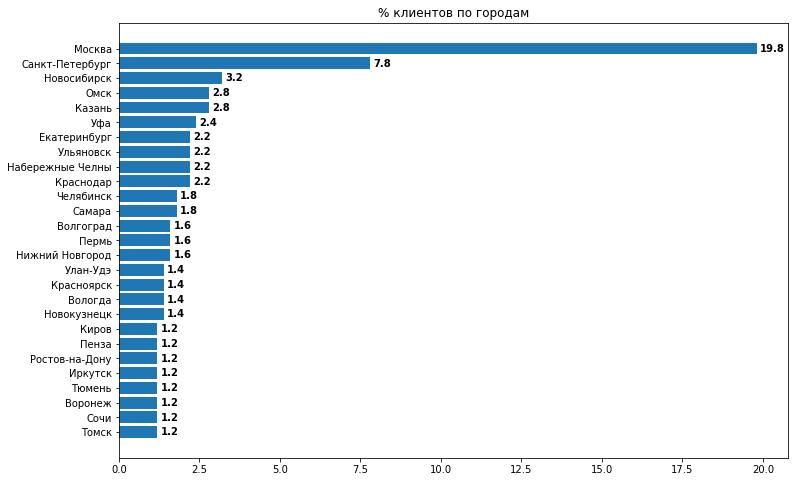

In [54]:
cities_pivot = users.pivot_table(index='city',
                                 values='user_id', 
                                 aggfunc='count').sort_values(by='user_id')

cities_pivot.columns = ['clients']

cities_pivot['percent'] = ((cities_pivot['clients']/500)*100).round(1)

cities_pivot = cities_pivot.query('percent > 1').sort_values(by='percent', ascending=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(cities_pivot.index, cities_pivot['percent'])
ax.set_title('% клиентов по городам')

for i in ax.patches:
    plt.text(i.get_width()+0.1,
    i.get_y()+0.2, str(round(i.get_width(),1)),
    fontsize=10, fontweight='bold', color='black')

plt.show()

Видим, что основные клиенты - Москва и Санкт-Петербург.

In [55]:
table[['mb_used', 'sms', 'calls', 'minutes', 'pay_for_month', 'extra_pay']].describe()

,mb_used,sms,calls,minutes,pay_for_month,extra_pay
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000
mean,17297.550453,38.348641,50.828803,452.322087,1485.850666,509.858789
std,7513.504652,36.191275,26.933507,241.731852,784.734334,734.862502
min,202.000000,0.000000,0.000000,0.000000,550.000000,0.000000
25%,12567.000000,9.000000,32.000000,285.000000,694.000000,0.000000
50%,16986.000000,30.000000,50.000000,444.000000,1554.835938,108.000000
75%,21458.000000,57.000000,66.000000,589.000000,1950.000000,841.367188
max,49789.000000,224.000000,190.000000,1673.000000,6711.015625,6161.015625


Заметна тенденция к сокращению голосовой связи и смс и увеличению потребления интернет-трафика. Есть клиенты, которые даже ни разу за месяц не пользовались голосовой связью и смс. Переплачивает немало клиентов, посмотрим кто они и за что платят. Взглянем на гитограммы переплат пользователей каждого тарифа:

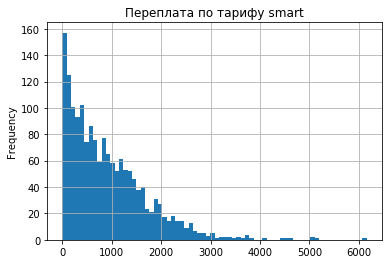

In [56]:
table.query('tariff == "smart" and extra_pay > 0').plot(y='extra_pay', kind='hist',
                                                        title='Переплата по тарифу smart',
                                                        bins=70, legend=False, grid=True)
plt.show()

Пользватели тарифа smart переплачивают примерно 1000 руб., при том, что абонентская плата 550 руб.

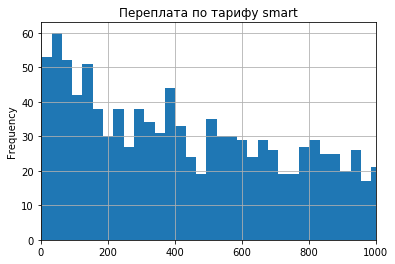

In [57]:
table.query('tariff == "smart" and extra_pay > 0').plot(y='extra_pay', kind='hist',
                                                        title='Переплата по тарифу smart',
                                                        bins=200, legend=False, grid=True,
                                                        xlim=(0,1000))
plt.show()

Видимо, клиентам не хватает тарифного плана, и они вынуждены переплачивать. Основная масса переплачивает 50-150 руб., но заметны цифры в 200, 400, 600 и 800 руб., что говорит о том, что люди докупают пакеты мегабайтов (200 руб. за 1 Гб). Теперь посмотрим на переплаты по тарифу **ultra**:

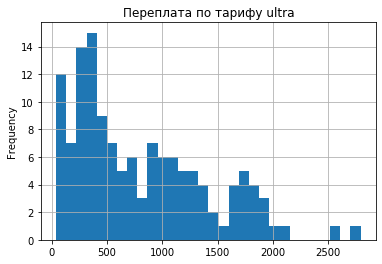

In [58]:
table.query('tariff == "ultra" and extra_pay > 0').plot(y='extra_pay', kind='hist',
                                                        title='Переплата по тарифу ultra',
                                                        bins=30, legend=False, grid=True)
plt.show()

Пользователи ultra тоже переплачивают, но в основном до 500 руб.

Создадим срезы данных sample_smart и sample_ultra и посмотрим на диаграммы размаха.

In [59]:
sample_smart =  table.query('tariff == "smart"')
sample_ultra =  table.query('tariff == "ultra"')

In [60]:
sample_smart['pay_for_month'].describe().to_frame()

,pay_for_month
count,2227.000000
mean,1233.963162
std,787.775434
min,550.000000
25%,550.000000
50%,961.093750
75%,1668.558594
max,6711.015625


In [61]:
sample_ultra['pay_for_month'].describe().to_frame()

,pay_for_month
count,974.000000
mean,2061.778256
std,358.118484
min,1950.000000
25%,1950.000000
50%,1950.000000
75%,1950.000000
max,4743.310547


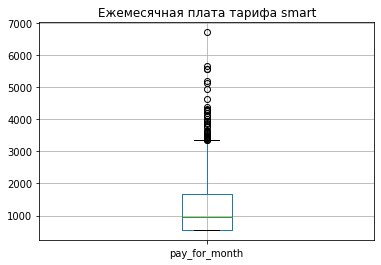

In [62]:
sample_smart.plot(y='pay_for_month', kind='box', title='Ежемесячная плата тарифа smart',
                                                                legend=False, grid=True)
plt.show()

По тарифу **smart** медиана ежемесячной платы 961 руб., стандартное отклонение - 787 руб. (помним о том, что абонентская плата по этому тарифу 550 руб.)

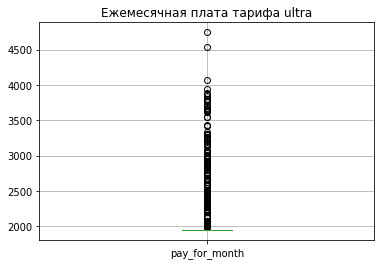

In [63]:
sample_ultra.plot(y='pay_for_month', kind='box', title='Ежемесячная плата тарифа ultra',
                                                                legend=False, grid=True)
plt.show()

По тарифу **ultra** удивительная ситуация, когда минимум совпадает с первым, вторым и третьим квартилями, что говорит о том, что большинство пользователей довольны тарифом, стандартное отклонение составляет 358 руб.

Сравним выручку за год по тарифам:

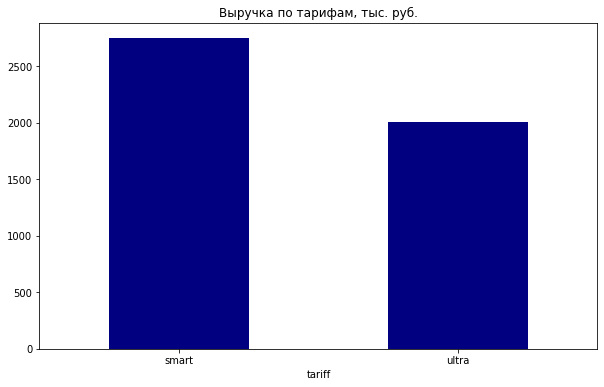

In [64]:
total_gain = table.groupby('tariff')['pay_for_month'].sum().to_frame()
total_gain.columns = ['total_gain']

total_gain['total_gain'] = total_gain['total_gain']/1000

total_gain.plot(y='total_gain', kind='bar', rot=0, color='navy',
                title='Выручка по тарифам, тыс. руб.', figsize=(10,6), legend=False)
plt.show()

In [65]:
display(total_gain)

,total_gain
tariff,
smart,2748.035961
ultra,2008.172021


Видим, что большую часть годовой выручки (2748,04 тыс. руб.) производят пользователи тарифа **smart**, но нужно учитывать, что они составляют 70,2% от всех пользователей. Пользователи тарифа **ultra**, при своем меньшинстве (29,8%) генерируют 42,2% всей выручки. Посмотрим, какими услугами связи пользуются клиенты каждого тарифа.

In [66]:
table.pivot_table(index='tariff', values=['minutes', 'sms', 'mb_used'], aggfunc='sum')

,mb_used,minutes,sms
tariff,,,
smart,36174861,931484,74411
ultra,19194598,516399,48343


Видим, что пользователи тарифа **smart** активнее пользуются всеми услугами связи, но ведь и по численности пользователи тарифа smart превосходят пользователей **ultra**. Посмотрим, какие услуги выходят за рамки пакета услуг, включенного в тарифный план:

In [67]:
table.pivot_table(index='tariff', values=['extra_minutes', 'extra_sms', 'extra_internet'],
                                                                           aggfunc='sum')

,extra_internet,extra_minutes,extra_sms
tariff,,,
smart,6175667,92739,12928
ultra,743233,0,0


Всем пользователем **ultra** хватает включенных минут и смс, пользователи **smart** не укладываются в свой тариф. Интернет-трафик дозаказывают все, но пользователи **smart** делают это чаще.

In [68]:
sample_smart[['minutes', 'sms', 'mb_used']].describe()

,minutes,sms,mb_used
count,2227.000000,2227.000000,2227.000000
mean,418.268523,33.413112,16243.763359
std,190.073088,28.223851,5860.041941
min,0.000000,0.000000,202.000000
25%,282.500000,10.000000,12677.000000
50%,422.000000,28.000000,16533.000000
75%,545.000000,51.000000,20068.000000
max,1435.000000,143.000000,38610.000000


Медиана ипользованных минут составляет 422 минуты, то есть большинство пользователей **smart** почти полностью выбирают лимит тарифа по минутам. Медиана интернет-трафика (16533 Мб) уже превышает лимит тарифа (15 Гб).

In [69]:
sample_ultra[['minutes', 'sms', 'mb_used']].describe()

,minutes,sms,mb_used
count,974.000000,974.000000,974.000000
mean,530.183778,49.633470,19706.979466
std,317.495884,47.979764,9937.127298
min,0.000000,0.000000,366.000000
25%,294.250000,6.000000,12073.750000
50%,520.500000,38.500000,19427.500000
75%,752.000000,79.000000,26936.250000
max,1673.000000,224.000000,49789.000000


Медиана ипользованных минут составляет 520 минут, а максимальное значение равно 1673 минутам, получается, никто из пользователей полностью не выбирает минуты своего тарифного плана (3000 минут). Пользователи **ultra** активнее пользуются интернетом, чем пользователи **smart**, но медиана интернет-трафика (19427 Мб) не превышает тарифный лимит (30 Гб). И тем не менее, есть пользователи, которые дозаказывают пакеты трафика и на этом тарифе.

Для более пристального взгляда на распределение минут, смс и интернет-трафика по тарифам нужно построить гистограммы, но для начала следует избавиться от редких и выбивающихся значений. Посмотрим на диаграммы размаха:

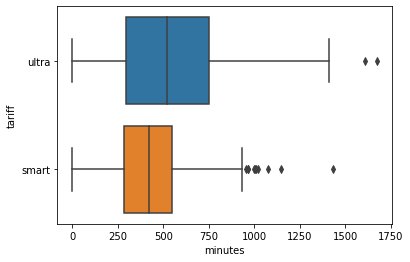

In [70]:
ax = sns.boxplot(y='tariff', x='minutes', orient='h', data=table)

Определим границы минут для каждого тарифа:
* smart: 0 - 1000 минут;
* ultra: 0 - 1350 минут.

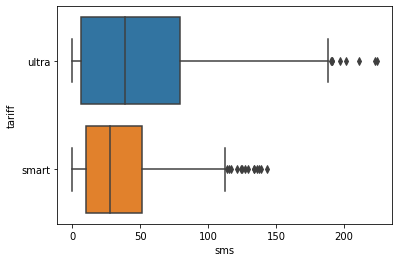

In [71]:
ax = sns.boxplot(y='tariff', x='sms', orient='h', data=table)

Определим границы смс для каждого тарифа:
* smart: 0 - 120 смс;
* ultra: 0 - 180 смс.

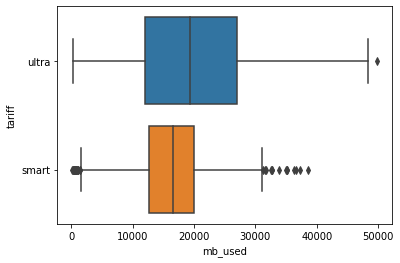

In [72]:
ax = sns.boxplot(y='tariff', x='mb_used', orient='h', data=table)

Определим границы интернет-трафика для каждого тарифа:
* smart - 202 - 32000 Мб;
* ultra - 0 - 48000 Мб.

Сформируем датасеты без выбросов:

In [73]:
sample_smart = sample_smart.query(
    'minutes <= 1000 or sms <= 120 or 202 <= mb_used <= 32000'
)


sample_ultra = sample_ultra.query(
    'minutes <= 1350 or sms <= 180 or mb_used <= 48000'  
)

Создадим функцию, которая будет считать среднее, медиану, дисперсию и стандартное отклонение, сводить все в таблицу и строить гистограммы.

In [74]:
def pivot_and_plot(data1, data2, column, bins):
    
    mean_smart = (data1[column].mean()).round(2)
    median_smart = (data1[column].median()).round(2)
    variance_smart = (np.var(data1[column], ddof=1)).round(2)
    std_smart = (np.std(data1[column], ddof=1)).round(2)

    mean_ultra = (data2[column].mean()).round(2)
    median_ultra = (data2[column].median()).round(2)
    variance_ultra = (np.var(data2[column], ddof=1)).round(2)
    std_ultra = (np.std(data2[column], ddof=1)).round(2)


    data = {'mean': [mean_smart, mean_ultra], 'median':[median_smart, median_ultra], 
                                       'variance': [variance_smart, variance_ultra],
                                                     'std': [std_smart, std_ultra]}
    info = pd.DataFrame(data)
    info.index = ['smart', 'ultra']
    display(info)


    fig, ax = plt.subplots(figsize=(10,8))
    

    data1.plot(y=column, kind='hist', color='blue', ax=ax, label='smart', bins=bins,
                                                             legend=True, grid=True)


    data2.plot(y=column, kind='hist', color='orange', ax=ax, label='ultra', bins=bins,
                                                               legend=True, grid=True)

    plt.axvline(x=mean_smart, linewidth=2, label='Среднее smart = {}'.format(mean_smart),
                                                          color='green', linestyle='--')

    plt.axvline(x=mean_ultra, linewidth=2, label='Среднее ultra = {}'.format(mean_ultra),
                                                            color='red', linestyle='--')

    plt.legend(loc='upper right')
    plt.title('Гистограмма ' + column + ' по тарифам')

    plt.show()

,mean,median,variance,std
smart,418.27,422.0,36127.78,190.07
ultra,530.18,520.5,100803.64,317.50


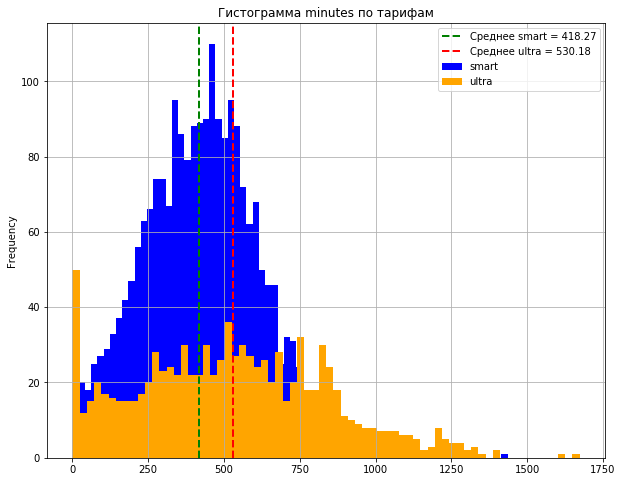

In [75]:
pivot_and_plot(sample_smart, sample_ultra, 'minutes', 70)

Распределение нормальное, значения средних и медиан похожи. Есть пик около нуля в тарифе **ultra**, это связано с тем, что не все клиенты тарифа используют голосовую связь. Среднее **ultra** превышает среднее **smart**, но не намного.

,mean,median,variance,std
smart,33.41,28.0,796.59,28.22
ultra,49.63,38.5,2302.06,47.98


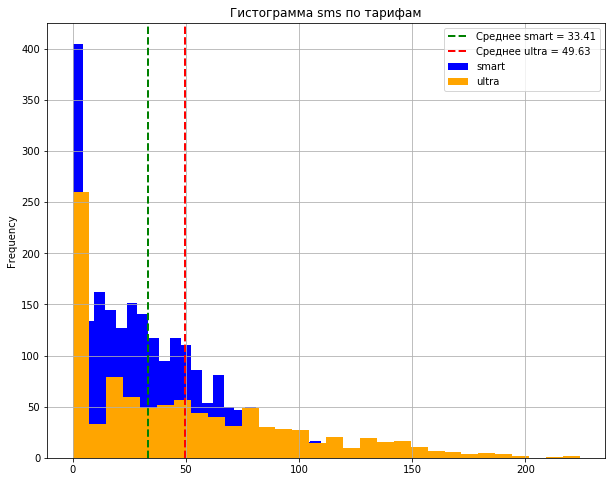

In [76]:
pivot_and_plot(sample_smart, sample_ultra, 'sms', 30)

Медиана меньше среднего, распределение смещено вправо. Самые высокие пики по обоим тарифам около нуля - все меньше людей пользуются смс.

,mean,median,variance,std
smart,16243.76,16533.0,34340091.55,5860.04
ultra,19706.98,19427.5,98746498.93,9937.13


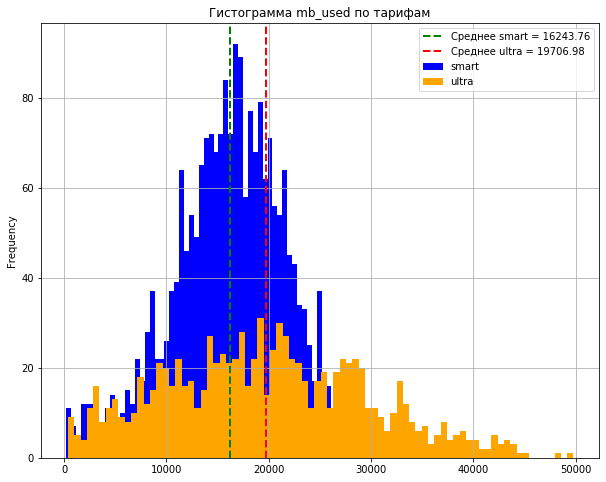

In [77]:
pivot_and_plot(sample_smart, sample_ultra, 'mb_used', 80)

Распределение нормальное, значения средних и медиан похожи. Среднее **ultra** превышает среднее **smart** на 3500 Мб.

Построим диаграммы рассеяния для тарифов **smart** и **ultra**:

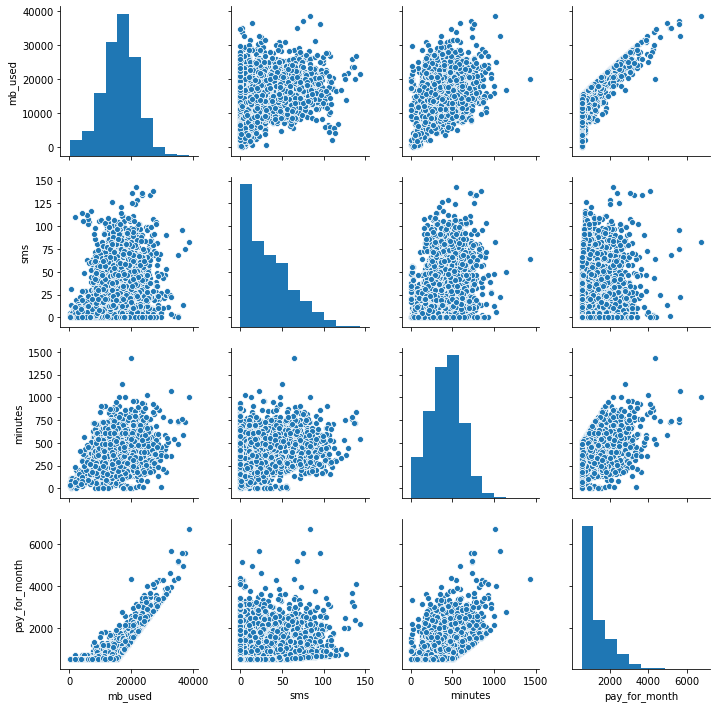

In [78]:
sns.pairplot(sample_smart[['mb_used', 'sms', 'minutes', 'pay_for_month']])
plt.show()

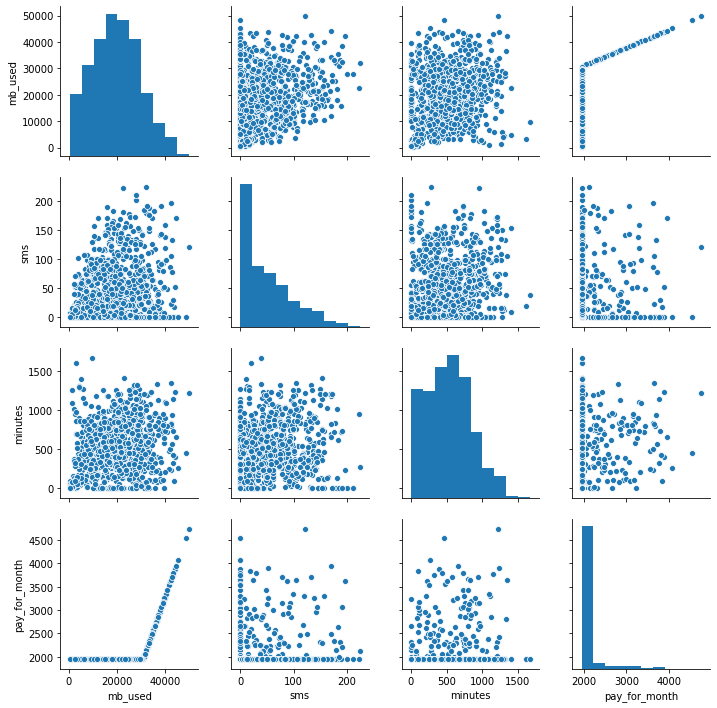

In [79]:
sns.pairplot(sample_ultra[['mb_used', 'sms', 'minutes', 'pay_for_month']])
plt.show()

Видим, что на тарифе **smart** резкий подъем месячной платы происходит после использования 15 Гб трафика и 500 минут разговора, на тарифе **ultra** - после использования 30 Гб трафика, с минутами такой зависимости нет.

Посмотрим на корреляцию месячной платы по тарифам:

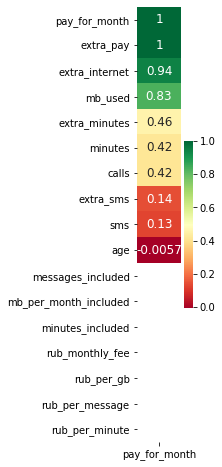

In [80]:
plt.figure(figsize=(1,8))
sns.heatmap(sample_smart.corr()[['pay_for_month']].sort_values(by='pay_for_month',
                                                               ascending=False),
                                                               cmap='RdYlGn', 
                                                               annot=True,
                                                               annot_kws={'size':12})
plt.show()

Месячная плата на тарифе **smart** определяется, в основном, покупкой пакетов трафика сверх лимита, и немного меньше, минутами звонков, выходящими за лимит.

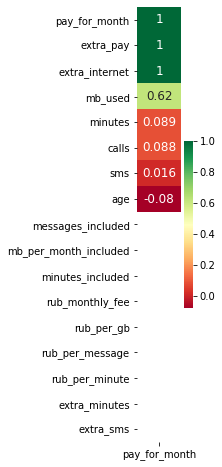

In [81]:
plt.figure(figsize=(1,8))
sns.heatmap(sample_ultra.corr()[['pay_for_month']].sort_values(by='pay_for_month',
                                                               ascending=False),
                                                               cmap='RdYlGn', 
                                                               annot=True,
                                                               annot_kws={'size':12})
plt.show()

Для тарифа **ultra** месячная плата определяется только покупкой интернет-трафика, минут хватает всем клиентам.

### Вывод:         
В результате исследования получились следующие выводы:

* Пользователям **smart** хватает включенных минут, но на грани, некоторые пользователи выходят за лимиты тарифного плана. Интернет-трафика не хватает очень многим, 15 Гб - уже мало по современным меркам.

* Пользователям **ultra** хватает включенных минут, никто еще не потратил весь лимит (3000 минут). Интернет-трафика в основном хватает, дополнительные пакеты заказывают отдельные пользователи.

<a href='#step0'>Вернуться к оглавлению</a>

### 5. Проверка гипотез. <a id='step5'></a>

Проверим гипотезу о том, что средняя выручка от клиентов тарифа **smart** отличается от клиентов тарифа **ultra**. Сформулируем нулевую и альтернативную гипотезу:

* Н0: средняя выручка от клиентов тарифа **smart** не отличается от клиентов тарифа **ultra**;
* Н1: средняя выручка от клиентов тарифа **smart** отличается от клиентов тарифа **ultra**.

Применим тест Стьюдента для двух независимых генеральных совокупностей:

In [82]:
alpha = 0.05
result = st.ttest_ind(sample_smart['pay_for_month'], sample_ultra['pay_for_month'],
                                                                   equal_var=False)

print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  4.5552725085155835e-294
Отвергаем нулевую гипотезу


Получается, что средняя выручка от пользователей тарифа **smart** отличается от средней выручки от пользователей тарифа **ultra**. Мы не можем сказать, в какую сторону, можем сказать только, что отличия есть. Из любопытства проверим их статистическую значимость:

In [83]:
print('Средняя выручка по тарифу smart: ', sample_smart['pay_for_month'].mean())
print('Средняя выручка по тарифу ultra: ', sample_ultra['pay_for_month'].mean())

Средняя выручка по тарифу smart:  1233.9631616243826
Средняя выручка по тарифу ultra:  2061.778256144122


Действительно, средняя выручка от пользователей тарифа **ultra** превышает выручку от пользователей тарифа **smart** в 1,67 раза (что неудивительно, ведь абонентская плата по тарифу **ultra** составляет 1950 руб. против тарифа **smart** за 550 руб.)

Теперь проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Сформулируем нулевую и альтернативную гипотезу:

* Н0: средняя выручка от клиентов из Москвы не отличается от средней выручки от клиентов из других регионов;
* Н1: средняя выручка от клиентов из Москвы отличается от средней выручки от клиентов из других регионов.

Сначала избавимся от некоторых аномалий в датасете, замем применим тест Стьюдента для двух независимых генеральных совокупностей.

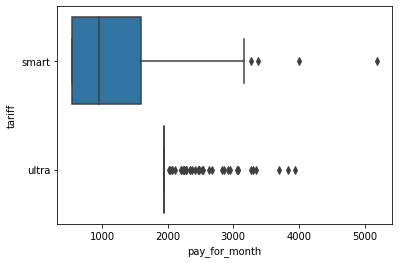

In [84]:
ax = sns.boxplot(y='tariff', x='pay_for_month', orient='h',
                      data=table.query('city == "Москва"'))

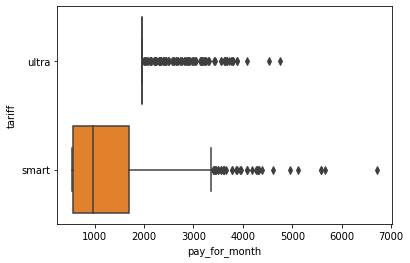

In [85]:
ax = sns.boxplot(y='tariff', x='pay_for_month', orient='h',
                     data=table.query('city != "Москва"'))

Бережно отфильтруем выбросы таким образом:
* ежемесячная плата для Москвы:
    * тариф smart: 550-3300 руб.;
    * тариф ultra: 1950-2600 руб.  
    

* ежемесячная плата для регионов:
    * тариф smart: 550-3700 руб.;
    * тариф ultra: 1950-3200 руб.

Сформируем датасеты без выбросов:

In [86]:
sample_moscow = table.query('city == "Москва" and ((tariff == "smart" and 550 <= pay_for_month <= 3300) or (tariff == "ultra" and 1950 <= pay_for_month <= 2600))')

In [87]:
sample_region = table.query('city != "Москва" and ((tariff == "smart" and 550 <= pay_for_month <= 3700) or (tariff == "ultra" and 1950 <= pay_for_month <= 3200))')

In [88]:
alpha = 0.05
result = st.ttest_ind(sample_moscow['pay_for_month'], sample_region['pay_for_month'],
                                                                   equal_var=False)

print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  0.5630574201498266
Не получилось отвергнуть нулевую гипотезу


Получается, что выручка от клиентов из Москвы не отличается от выручки от клиентов из других регионов. Снова ради любопытства проверим статистическую значимость:

In [89]:
print('Средняя выручка от клиентов из Москвы: ', sample_moscow['pay_for_month'].mean())
print('Средняя выручка от клиентов из регионов: ', sample_region['pay_for_month'].mean())

Средняя выручка от клиентов из Москвы:  1451.7849355765177
Средняя выручка от клиентов из регионов:  1433.8962724793632


Действительно, различие в 18 рублей нельзя назвать статистически значимым.

<a href='#step0'>Вернуться к оглавлению</a>

### 6. Общий вывод. <a id='step6'></a>

Визулизируем результаты нашего исследования, создав наглядную таблицу:

In [90]:
data = {'monthly_fee': [sample_smart['rub_monthly_fee'].mean(), 
                        sample_ultra['rub_monthly_fee'].mean()],
        'pay_for_month': [sample_smart['pay_for_month'].mean(),
                          sample_ultra['pay_for_month'].mean()], 
        'minutes': [sample_smart['minutes'].mean(), sample_ultra['minutes'].mean()],
        'sms': [sample_smart['sms'].mean(), sample_ultra['sms'].mean()],
        'mb_used':  [sample_smart['mb_used'].mean(), sample_ultra['mb_used'].mean()],
        'minutes_extra': [sample_smart['extra_minutes'].mean(),
         sample_ultra['extra_minutes'].mean()],
        'sms_extra': [sample_smart['extra_sms'].mean(),
         sample_ultra['extra_sms'].mean()],
        'internet_extra': [sample_smart['extra_internet'].mean(),
         sample_ultra['extra_internet'].mean()],
       }

info = pd.DataFrame(data)
info.index = ['smart', 'ultra']
display(info)

,monthly_fee,pay_for_month,minutes,sms,mb_used,minutes_extra,sms_extra,internet_extra
smart,550.0,1233.963162,418.268523,33.413112,16243.763359,41.643018,5.805119,2773.088011
ultra,1950.0,2061.778256,530.183778,49.633470,19706.979466,0.000000,0.000000,763.072895


Пользователи тарифа **smart**:
* составляют 70,2% всех клиентов
* генерируют годовую выручку 2748 тыс.руб.
* ежемесячно переплачивают сумму, равную еще одной абонентской плате
* полностью использут лимит минут, включенных в тарифный план
* активно пользуются интернетом и ежемесячно превышают лимиты тарифного плана на 2 Гб (докупают пакеты интернет-трафика на сумму 400 рублей)

Пользователи тарифа **ultra**:
* составляют 29,8% всех клиентов
* генерируют годовую выручку 2008 тыс.руб. (при своей малочисленности)
* никогда не используют весь лимит минут, включенных в тарифный план
* почти не переплачивают сверх лимита, а если и переплачивают, то точно не за минуты, а за интернет
* пользуются интернетом немного активнее, чем пользователи тарифа smart, трафика большинству хватает, немногие превышают лимит.

Вот он, тот самый дьявол в деталях, о котором мы говорили в середине исследования. Клиенты подключают недорогой тариф за 550 руб., а по факту переплачивают еще столько же, потому что не укладываются в тарифные лимиты.

Можно рекомендовать компании "Мегалайн" разработать третий тариф, нечто среднее между **smart** и **ultra**. Средний клиент, подключенный к **smart**, докупает пакеты интернет-трафика (2 Гб на сумму 400 руб.), это значит, что он может себе позволить тратить еще дополнительно 400 рублей в качестве абонентской платы. Можно разработать тариф за 950 руб., включающий в себя 18-20 Гб интернет-трафика, 600 минут разговора и 50 смс. Это позволит клиентам не беспокоиться о выходе за лимиты тарифного плана, не заказывать постоянно пакеты интернет-трафика, а компании "Мегалайн" - выглядеть привлекательно на рынке мобильной связи.

<a href='#step0'>Вернуться к оглавлению</a>